In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sc
import io
import requests

url1 = "https://raw.githubusercontent.com/SzMatej/IAU_2020-2021/main/65/other_train.csv"
url2 = "https://raw.githubusercontent.com/SzMatej/IAU_2020-2021/main/65/personal_train.csv"

db1 = requests.get(url1).content
db2 = requests.get(url2).content
train = pd.read_csv(io.StringIO(db1.decode('utf-8')))
other = pd.read_csv(io.StringIO(db2.decode('utf-8')))

personal_train dataset ->

In [73]:
data = pd.read_csv(io.StringIO(db2.decode('utf-8')), na_values='?', index_col=0)
data.head(15)

,name,address,age,sex,date_of_birth
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\nEast Andrew, OH 53211",52,Female,1967-01-18
1,Ernest Kline,"391 Ball Road Suite 961\nFlowersborough, IN 57550",46,Male,1973-10-09 00:00:00
2,Harold Hendriks,"8702 Vincent Square\nNew Jerryfurt, CO 30614",41,Male,1978-07-04
3,Randy Baptiste,"2751 Harris Crossroad\nWest Ashley, CA 30311",57,Male,1962-01-11
4,Anthony Colucci,"904 Robert Cliffs Suite 186\nWest Kyle, CO 77139",63,Female,1956-04-02 00 00 00
5,Ronald Lange,"30973 Martinez Shores\nJameston, CA 70245",54,Male,1965-03-10
6,Boyd Eiselein,"29941 Christopher Curve Apt. 682\nRaychester, ...",53,Female,1966-05-20 00:00:00
7,Raymond Smith,"53487 Scott Extensions Apt. 824\nMccartytown, ...",??,Male,1975-08-13
8,Harold Miller,"8514 Elizabeth Crescent\nWest Joseland, GA 49359",49,Male,1970-09-22
9,Charles Czachorowski,"6798 Wagner Locks Suite 377\nLake Brenda, DC 5...",NaN,Female,1960-10-24


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3932
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3933 non-null   object
 1   address        3933 non-null   object
 2   age            3669 non-null   object
 3   sex            3933 non-null   object
 4   date_of_birth  3933 non-null   object
dtypes: object(5)
memory usage: 107.5+ KB


In [75]:
data.describe()

,name,address,age,sex,date_of_birth
count,3933,3933,3669,3933,3933
unique,3933,3933,84,2,3716
top,Hal Shields,"498 Kristin Courts Apt. 179\nWest Teresaport, ...",53,Male,1964-11-17
freq,1,1,133,2659,3


-stĺpec vek je v tomto prípade zbytočný keď je uvedený dátum narodenia
-stlpec dátum narodenia je v rôznych formátoch (v niektorých riadkoch je uvedeý aj čas)

In [76]:
data['age'].unique()

array(['52', '46', '41', '57', '63', '54', '53', '??', '49', nan, '30',
       '55', '87', '42', '50', '33', '59', '65', '58', '51', '93', '40',
       '68', '43', '34', '78', '71', '23', '67', '39', '81', '38', '64',
       '44', '31', '48', '60', '35', '45', '12', '61', '62', '36', '70',
       '37', '56', '69', '86', '47', '26', '73', '21', '27', '19', '82',
       '66', '16', '99', '113', '25', '76', '29', '17', '32', '74', '80',
       '77', '28', '14', '22', '75', '79', '72', '18', '20', '24', '83',
       '85', '84', '3', '9', '15', '90', '7', '-1'], dtype=object)

V stĺpci age sa nachádzajú neumyselné hodnoty ako -1. Ďalej sú tu hodnoty ako 'nan' a '??' ktoré sú pravdepodobne myslené ako null ktoré by sa pri tomto stĺpci vyskytovať nemalo.

other_train dataset ->

In [77]:
train.columns

Index(['Unnamed: 0', 'name', 'address', 'race', 'marital-status', 'occupation',
       'pregnant', 'education-num', 'relationship', 'capital-gain',
       'education', 'fnlwgt', 'class', 'income', 'medical_info',
       'native-country', 'hours-per-week', 'capital-loss', 'workclass'],
      dtype='object')

In [78]:
data = pd.read_csv(io.StringIO(db1.decode('utf-8')), na_values='?', index_col=0)
data.head(15)

,name,address,race,marital-status,occupation,pregnant,education-num,relationship,capital-gain,education,fnlwgt,class,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,Jason Michaels,"498 Kristin Courts Apt. 179\nWest Teresaport, ...",White,Married-civ-spouse,Prof-specialty,t,14.0,Husband,0.0,Masters,270092.0,0.0,>50K,"{'mean_glucose':'111.8125','std_glucose':'44.8...",United-States,40.0,0.0,Private
1,Thomas Flynn,"92949 Wall Drives Apt. 679\nNew Tinaburgh, MT ...",White,Married-civ-spouse,Sales,f,10.0,Husband,0.0,Some-college,34278.0,1.0,>50K,"{'mean_glucose':'71.3984375','std_glucose':'47...",United-States,50.0,0.0,Private
2,John Cato,"99749 Michael Unions\nScottstad, IN 48755",White,Married-civ-spouse,Prof-specialty,f,14.0,Husband,0.0,Masters,107302.0,1.0,>50K,"{'mean_glucose':'102.796875','std_glucose':'37...",United-States,60.0,0.0,Private
3,John Mcdonald,"241 Michael Plains\nPort Stephanie, OH 65606",White,Married-civ-spouse,Adm-clerical,f,13.0,Husband,0.0,Bachelors,51089.0,1.0,>50K,"{'mean_glucose':'54.2578125','std_glucose':'41...",United-States,50.0,0.0,Federal-gov
4,Daniel Arreola,"4206 Tiffany Land Apt. 402\nSouth Michael, SC ...",White,Married-civ-spouse,Sales,FALSE,10.0,Husband,0.0,Some-college,32950.0,0.0,<=50K,"{'mean_glucose':'125.4921875','std_glucose':'5...",United-States,37.0,1902.0,Federal-gov
5,Joseph Perez,"023 Cook Bypass Apt. 625\nNorth Anna, FL 05626",White,Never-married,Sales,F,9.0,Not-in-family,0.0,HS-grad,177287.0,0.0,<=50K,"{'mean_glucose':'113.71875','std_glucose':'59....",United-States,38.0,0.0,Private
6,Lester Wilke,"7953 Jeffrey Port Apt. 213\nWest Theresa, NM 3...",White,Married-civ-spouse,Craft_repair,FALSE,4.0,Husband,0.0,7th-8th,34297.0,0.0,>50K,"{'mean_glucose':'101.375','std_glucose':'34.69...",United-States,40.0,0.0,Self-emp-not-inc
7,Matt Morgan,"6466 Young Springs\nLongville, HI 27314",White,Married-civ-spouse,Prof_specialty,f,14.0,Husband,7688.0,Masters,22211.0,1.0,>50K,"{'mean_glucose':'43.2265625','std_glucose':'30...",United-States,NaN,NaN,Private
8,Julian Patrick,"5005 Guerrero Street\nWest Christopherstad, AL...",Black,Separated,Priv-house-serv,f,9.0,Unmarried,0.0,HS-grad,296125.0,1.0,<=50K,"{'mean_glucose':'79.0703125','std_glucose':'43...",United-States,30.0,0.0,Private
9,Charles Langley,"3036 Bailey Loaf Suite 670\nSmithhaven, IL 04877",White,Never-married,?,f,NaN,Not-in-family,0.0,Some-college,35633.0,0.0,<=50K,"{'mean_glucose':'123.2109375','std_glucose':'5...",?,40.0,0.0,?


In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3983 non-null   int64  
 1   name            3983 non-null   object 
 2   address         3983 non-null   object 
 3   race            3960 non-null   object 
 4   marital-status  3967 non-null   object 
 5   occupation      3962 non-null   object 
 6   pregnant        3969 non-null   object 
 7   education-num   3569 non-null   float64
 8   relationship    3967 non-null   object 
 9   capital-gain    3963 non-null   float64
 10  education       3968 non-null   object 
 11  fnlwgt          3965 non-null   float64
 12  class           3964 non-null   float64
 13  income          3968 non-null   object 
 14  medical_info    3965 non-null   object 
 15  native-country  3969 non-null   object 
 16  hours-per-week  3961 non-null   float64
 17  capital-loss    3968 non-null   f

In [80]:
for x in train.columns:
    if (train[x].dtype == 'O'):
        print(x)
        print(train[x].unique())
        print()

name
['Jason Michaels' 'Thomas Flynn' 'John Cato' ... 'Alexander Ramon'
 'Ismael Petronella' 'Robert Edge']

address
['498 Kristin Courts Apt. 179\nWest Teresaport, MS 31418'
 '92949 Wall Drives Apt. 679\nNew Tinaburgh, MT 94939'
 '99749 Michael Unions\nScottstad, IN 48755' ...
 '80904 Johnson Forks\nEast Johnnychester, NE 59766'
 '944 Carrie Mall Apt. 017\nWilsonmouth, MO 77627'
 '29674 Debra Brooks Suite 737\nWest Melissa, OH 58782']

race
[' White' ' Black' ' Other' ' Amer-Indian-Eskimo' nan
 ' Asian-Pac-Islander']

marital-status
[' Married-civ-spouse' ' Never-married' ' Separated' ' Divorced'
 ' Married-spouse-absent' ' Widowed' nan ' Married-AF-spouse']

occupation
[' Prof-specialty' ' Sales' ' Adm-clerical' ' Craft_repair'
 ' Prof_specialty' ' Priv-house-serv' ' ?' ' Craft-repair'
 ' Other-service' ' Exec-managerial' ' Farming-fishing'
 ' Machine_op_inspct' ' Transport_moving' ' Handlers-cleaners'
 ' Transport-moving' ' Tech-support' ' Other_service' ' Exec_managerial'
 ' Farmin

In [81]:
train.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,3983,NaN,NaN,NaN,1991,1149.94,0,995.5,1991,2986.5,3982
name,3983,3933,Christopher Russo,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address,3983,3933,"614 Joshua Roads\nEast David, TN 41266",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,3960,5,White,3359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital-status,3967,7,Married-civ-spouse,1908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,3962,27,Prof-specialty,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pregnant,3969,6,f,3503,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,3569,NaN,NaN,NaN,10.0846,2.63973,1,9,10,13,16
relationship,3967,6,Husband,1673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital-gain,3963,NaN,NaN,NaN,1234.44,8505.4,0,0,0,0,99999


In [82]:
train.describe(exclude=np.number).transpose()

,count,unique,top,freq
name,3983,3933,Christopher Russo,2
address,3983,3933,"614 Joshua Roads\nEast David, TN 41266",2
race,3960,5,White,3359
marital-status,3967,7,Married-civ-spouse,1908
occupation,3962,27,Prof-specialty,491
pregnant,3969,6,f,3503
relationship,3967,6,Husband,1673
education,3968,16,HS-grad,1288
income,3968,2,<=50K,2978
medical_info,3965,3931,"{'mean_glucose':'117.0234375','std_glucose':'4...",2


In [83]:
train['pregnant'].describe()

count     3969
unique       6
top          f
freq      3503
Name: pregnant, dtype: object

-stlpec pregnent nejasný z dúvodu príliš veľa rôznych hodnôt
-nejasné pomenovanie stĺpca fnlwgt
-stlpec capital gain nedostatok hodnôt v tabuľke (veľa nulových hodnôt) 
-stĺpce education a education-num sú vlastne tie isté hodnoty len inak zapisované
-stĺpec capital loss takisto nedostatok hodnôt z dôvodu veľa nulových hodnôt

<AxesSubplot:>

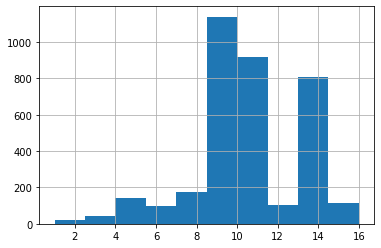

In [92]:
train['education-num'].hist()

c:\users\strak\virtual\env1\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education-num', ylabel='Density'>

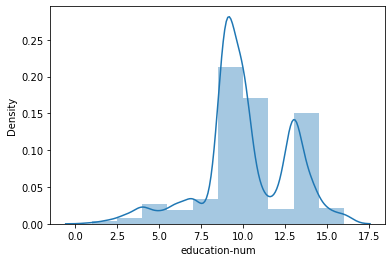

In [85]:
sns.distplot(train['education-num'], bins=10)

Následujúci graf vykresľuje zastúpenie ľudí podľa výšky študia. Hodnoty sú zoradené podľa poradia typu v atribúte. V tomto prípade majú v datasete najväčšie zastúpenie ľudia ktorí sa pohybujú okolo čísla 10 a to znamená že sú to ľudia z 9 až 10 ročnou školskou dochádzkou a ľudia skupiny assoc-acdm. Ďalej sa tu vyskytuje veľa ľudí s vyštudovaním masters.

c:\users\strak\virtual\env1\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

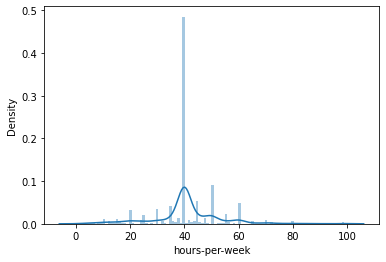

In [95]:
sns.distplot(train['hours-per-week'], bins=100)

<AxesSubplot:>

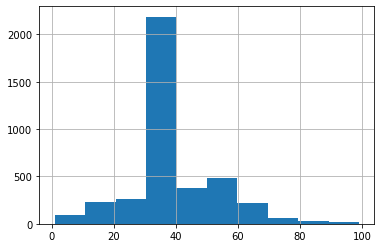

In [96]:
train['hours-per-week'].hist()

Následujúci graf vykresľuje zastúpenie ľudí v datasete podľa počtu odpracovaných hodín za týždeň. Najväčšie zastúpenie je zjavné podľa grafu a to 40 hodín/týždeň.